# <center>Тема 1. Разведочный анализ данных</center>
## <center>Практическое задание. Анализ данных пассажиров "Титаника"</center>

In [6]:
import numpy as np
import pandas as pd
%matplotlib inline

Мы будем работать с данными [Titanic](https://www.kaggle.com/c/titanic): он содержит информацию о пассажирах корабля, включая их демографические характеристики и выжил пассажир или нет.

**Считаем данные из файла в память в виде объекта Pandas.DataFrame**

In [32]:
data = pd.read_csv('./titanic.csv',
                  index_col='PassengerId')

## Описание данных

**Обучающий набор содержит признак Survived для каждого пассажира, обозначающий, выжил данный пассажир или нет (0 для умерших, 1 для выживших).**

**Каждая строчка наборов данных содержит следующие поля:**

**Pclass — класс пассажира (1 — высший, 2 — средний, 3 — низший);**

**Name — имя;**

**Sex — пол;**

**Age — возраст;**

**SibSp — количество братьев, сестер, сводных братьев, сводных сестер, супругов на борту титаника;**

**Parch — количество родителей, детей (в том числе приемных) на борту титаника;**

**Ticket — номер билета;**

**Fare — плата за проезд;**

**Cabin — каюта;**

**Embarked — порт посадки (C — Шербур; Q — Квинстаун; S — Саутгемптон).**

**Вывести размер таблицы**

In [10]:
data.shape

(891, 11)

**Данные представлены в виде таблицы. Вывести первые 5 строк:**

In [11]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Вывести описательную статистику**

In [32]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**Определите, сколько пассажиров выжило, а сколько - нет?**

In [70]:
data.Survived.value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

**Правда ли, что пассажиры более высокого класса имеют большие шансы на спасение?**

Для вычислений использовать groupby

In [112]:
data.groupby('Pclass').mean(numeric_only=True).get('Survived')  # false

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

**Правда ли, что женщины имеют большие шансы на спасение?**

Для вычислений использовать groupby

In [12]:
data.groupby('Sex').mean(numeric_only=True).get('Survived')  # true

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

**Cколько мужчин и женщин в каждом классе (Pclass)?**

Результаты представить в виде таблицы сопряженности.

In [115]:
data.groupby(['Pclass', 'Sex']).size().unstack()

Sex,female,male
Pclass,,
1,94,122
2,76,108
3,144,347


**Вывести пассажиров, которые сели в Шербуре (Embarked=C) и заплатили более 200 у.е. за билет (fare > 200). Отсортировать этих пассажиров по убыванию платы за билет.**

In [13]:
data[(data.Embarked == 'C') & (data.Fare > 200)].sort_values(by='Fare', ascending=False)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C
312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
743,1,1,"Ryerson, Miss. Susan Parker ""Suzette""",female,21.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
119,0,1,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,247.5208,B58 B60,C
300,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.0,0,1,PC 17558,247.5208,B58 B60,C
381,1,1,"Bidois, Miss. Rosalie",female,42.0,0,0,PC 17757,227.5250,NaN,C
717,1,1,"Endres, Miss. Caroline Louise",female,38.0,0,0,PC 17757,227.5250,C45,C


**Создать категориальный признак для заданных градаций возраста пассажира.**

In [36]:
def age_category(age):
    '''
    < 30 -> 1
    >= 30, < 55 -> 2
    >= 55 -> 3
    '''

    if age < 30:
        return 1
    elif age >= 30 and age < 55:
        return 2
    else:
        return 3

In [37]:
data.AgeCategory = data.Age.apply(age_category)
data.AgeCategory

C:\Users\doroh\AppData\Local\Temp\ipykernel_23280\3373909461.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  data.AgeCategory = data.Age.apply(age_category)


PassengerId
1      1
2      2
3      1
4      2
5      2
      ..
887    1
888    1
889    3
890    1
891    2
Name: Age, Length: 891, dtype: int64

**Определить, сколько мужчин / женщин находилось на борту?**

In [14]:
data.Sex.value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

**Выведите распределение переменной `Pclass` (социально-экономический статус) и это же распределение, только для мужчин / женщин по отдельности. Определить, сколько было мужчин 2-го класса**

In [ ]:
data.Pclass.value_counts()  # распределение классов
# data.groupby('Sex')['Pclass'].value_counts()  # распределение классов по полу
# len(data[(data.Sex == 'male') & (data.Pclass == 2)])  # количество мужчин во втором классе

108

**Определите, какова доля выживших пассажиров из класса 3? А пассажиров из класса 1?**

In [207]:
len(data[(data.Survived == 1) & (data.Pclass == 3)])  # доля выживших пассажирова из класса 3
# len(data[(data.Survived == 1) & (data.Pclass == 1)])  # доля выживших пассажирова из класса 1

119

**Определить медиану и стандартное отклонение платежей (`Fare`). Округлить до 2 десятичных знаков.**

In [215]:
np.round(data.Fare.mean(), 2)  # медиана Fare
# np.round(data.Fare.std(), 2)  # стандартное отклонение Fare

np.float64(32.2)

**Проверить, что люди моложе 30 лет выживают чаще, чем люди старше 60 лет. Определить доли выживших в обеих группах**

In [ ]:
youngs = data[data.Age < 30]
youngs_survived = youngs[youngs.Survived == 1]
young_fraction = np.round(len(youngs_survived) / len(youngs), 2)  # доля типов до 30, которые выжили
young_fraction

olds = data[data.Age > 60]
olds_survived = olds[olds.Survived == 1]
olds_fraction = np.round(len(olds_survived) / len(olds), 2)  # доля старых типов больше 60, которые выжили

if young_fraction > olds_fraction: 
  print('Типы младше 30 выживают больше, чем старые')
else: 
  print('Типы старше 60 выживают больше, чем младшие')

Типы младше 30 выживают больше, чем старые


np.float64(0.23)

**Проверить, что женщины выживают чаще мужчин. Определить доли выживших в обеих группах**

In [ ]:
females = data[data.Sex == 'female']
females_survived = females[females.Survived == 1]
females_fraction = np.round(len(females_survived) / len(females), 2)  # доли выживших женщин

males = data[data.Sex == 'male']
males_survived = males[males.Survived == 1]
males_fraction = np.round(len(males_survived) / len(males), 2)  # доли выживших мужчин

if females_fraction > males_fraction: 
  print('Женщины выживают чаще мужчин')
else: 
  print('Мужики выживают чаще женщин')

Женщины выживают чаще мужчин


**Найдите самое популярное имя среди пассажиров Титаника мужского пола**

Name
Dooley, Mr. Patrick               1
Giles, Mr. Frederick Edward       1
Hansen, Mr. Claus Peter           1
Razi, Mr. Raihed                  1
Daly, Mr. Peter Denis             1
                                 ..
Saundercock, Mr. William Henry    1
Palsson, Master. Gosta Leonard    1
McCarthy, Mr. Timothy J           1
Moran, Mr. James                  1
Allen, Mr. William Henry          1
Name: count, Length: 577, dtype: int64

**Определить, как отличается средний возраст мужчин / женщин в зависимости от класса обслуживания. Выберать верные утверждения:**
- В среднем мужчины 1-го класса старше 40 лет
- В среднем женщины 1-го класса старше 40 лет
- Мужчины всех классов в среднем старше женщин того же класса
- В среднем люди в 1 классе старше, чем во 2-ом, а те старше представителей 3-го класса

In [ ]:
male_age_avg = data[(data.Sex == 'male') & (data.Pclass == 1)].Age.mean()  # avg мужиков 1-го класса
female_age_avg = data[(data.Sex == 'female') & (data.Pclass == 1)].Age.mean()  # avg женщен 1-го класса

males_all_age_class = data[data.Sex == 'male'].Age.mean()  # age avg мужиков
females_all_age_class = data[data.Sex == 'female'].Age.mean()  # age avg женщин

people_age_avg_first_class = data[data.Pclass == 1].Age.mean()  # age avg людей 1-го класса
people_age_avg_second_class = data[data.Pclass == 2].Age.mean()  # age avg людей 2-го класса
people_age_avg_third_class = data[data.Pclass == 3].Age.mean()  # age avg людей 3-го класса

if male_age_avg > 40: 
  print('[if-1]: В среднем мужики в первом классе старше 40 лет')
else: 
  print('[if-1]: Ничего подобного. Мужики в первом классе меньше 40-ка лет')

if female_age_avg > 40: 
  print('[if-2]: В среднем девушки в первом классе старше 40 лет')
else: 
  print('[if-2]: Ничего подобного! Вумены в первом классе меньше 40-ка лет')

if males_all_age_class > females_all_age_class: 
  print('[if-3]: Мужчины всех классов в среднем старше женщин того же класса')
else: 
  print('[if-3]: Ничего подобного. Мужчины всех классов в среднем младше женщин того же класса')

if people_age_avg_first_class > people_age_avg_second_class > people_age_avg_third_class:
  print('[if-4]: В среднем люди в 1 классе старше, чем во 2-ом, а те старше представителей 3-го класса')
else: 
  print('[if-4]: Ничего подобного. Четвёртое утверждение ложно!')


[if-1]: В среднем мужики в первом классе старше 40 лет
[if-2]: Ничего подобного! Вумены в первом классе меньше 40-ка лет
[if-3]: Мужчины всех классов в среднем старше женщин того же класса
[if-4]: В среднем люди в 1 классе старше, чем во 2-ом, а те старше представителей 3-го класса


**Визуализируйте пропуски**

Используем библиотеку `missingno`

<Axes: >

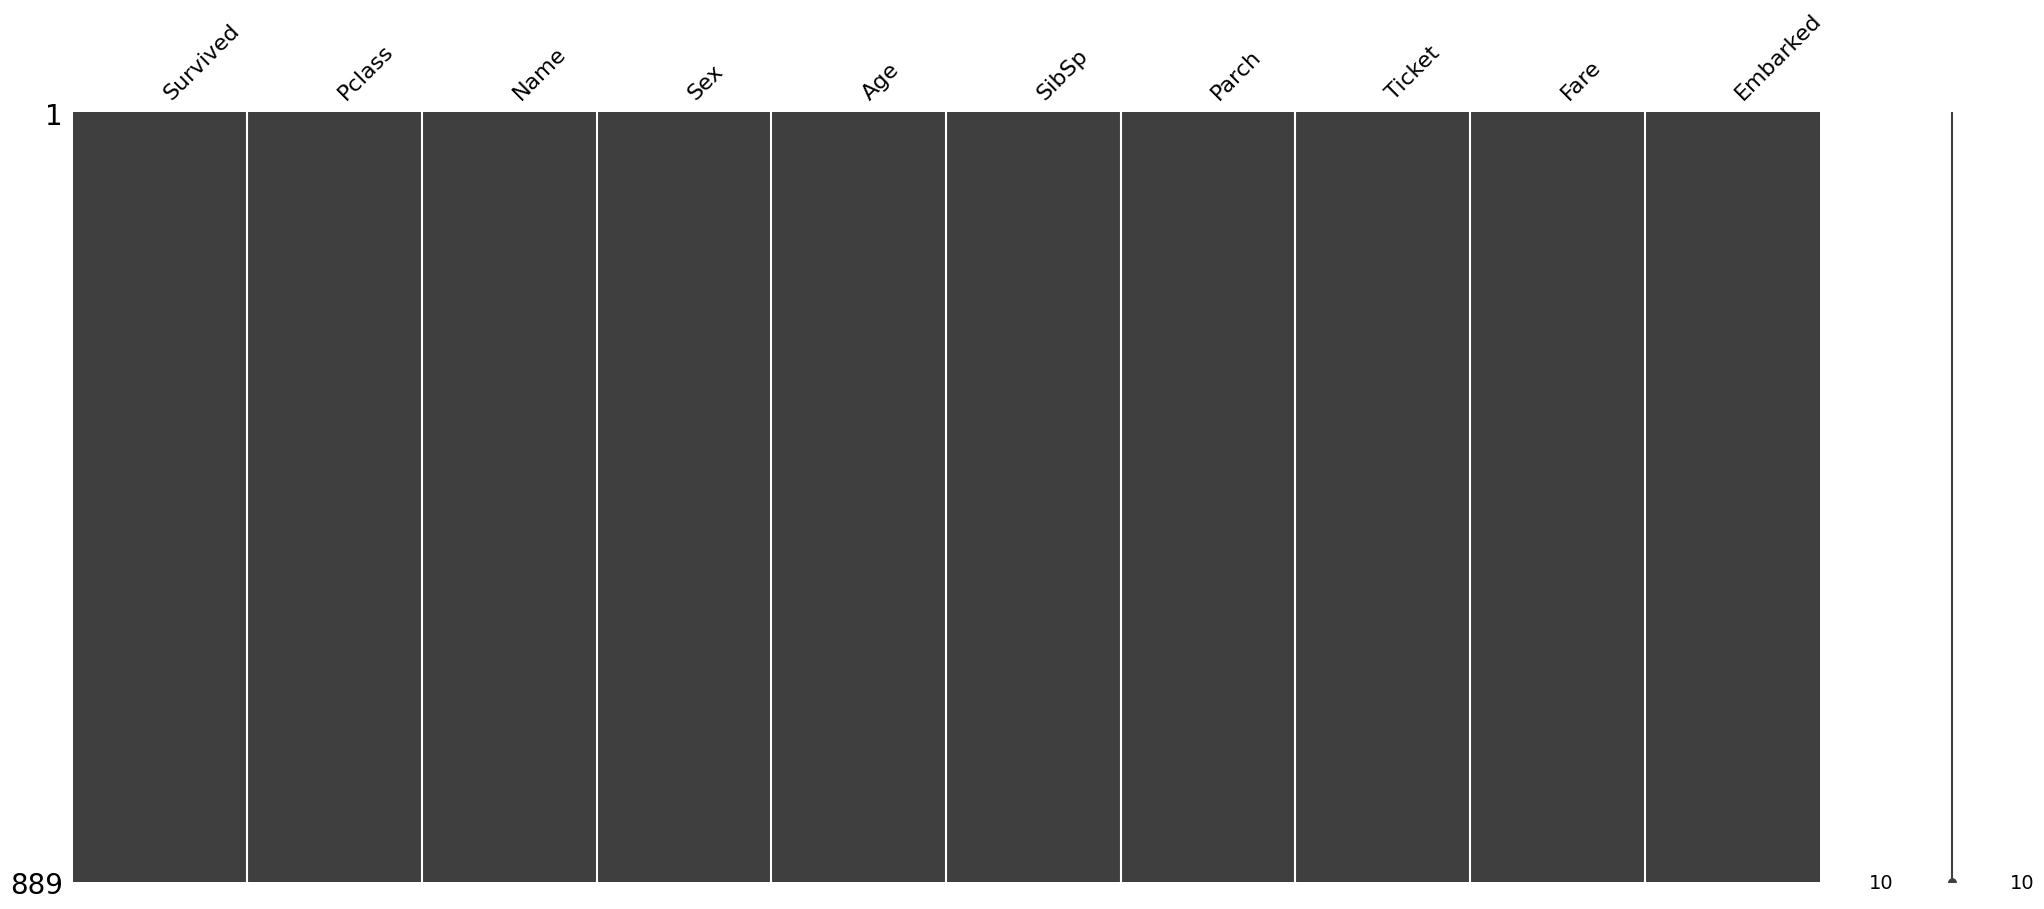

In [24]:
import missingno as msno
msno.matrix(data)

**Выкинем признак Cabin. Столбец Age заполним медианным значением. Оставшиеся строки с пропусками удалим.**

In [39]:
data = data.drop(columns=['Cabin'])  # удаляем столбец Cabin
data.Age = data.Age.fillna(data.Age.median())  # всталвяем медиану в пустые значения
data = data.dropna()  # удаляем строки с пустыми значениями
data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,S


**Для категориальных переменных построить столбчатую диаграмму**

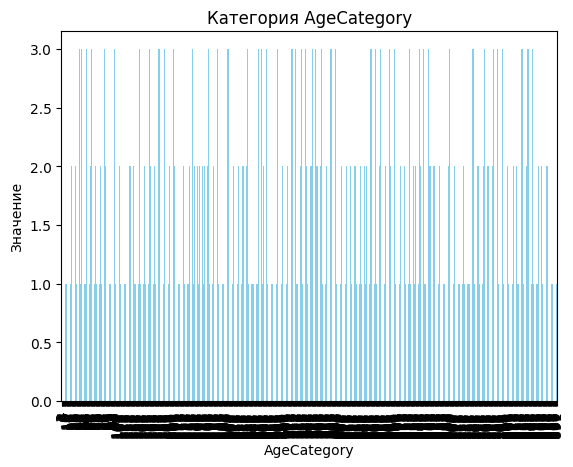

In [38]:
import matplotlib.pyplot as plt

data.AgeCategory.plot(kind='bar', color='skyblue')

plt.title('Категория AgeCategory')
plt.xlabel('AgeCategory')
plt.ylabel('Значение')

plt.show()

**Постройте попарные зависимости (диаграммы рассеяния) для признаков `Age`, `Fare`, `Pclass`, `Sex`, `SibSp`, `Parch`, `Embarked` и `Survived`. (метод `scatter_matrix ` Pandas или `pairplot` Seaborn).**

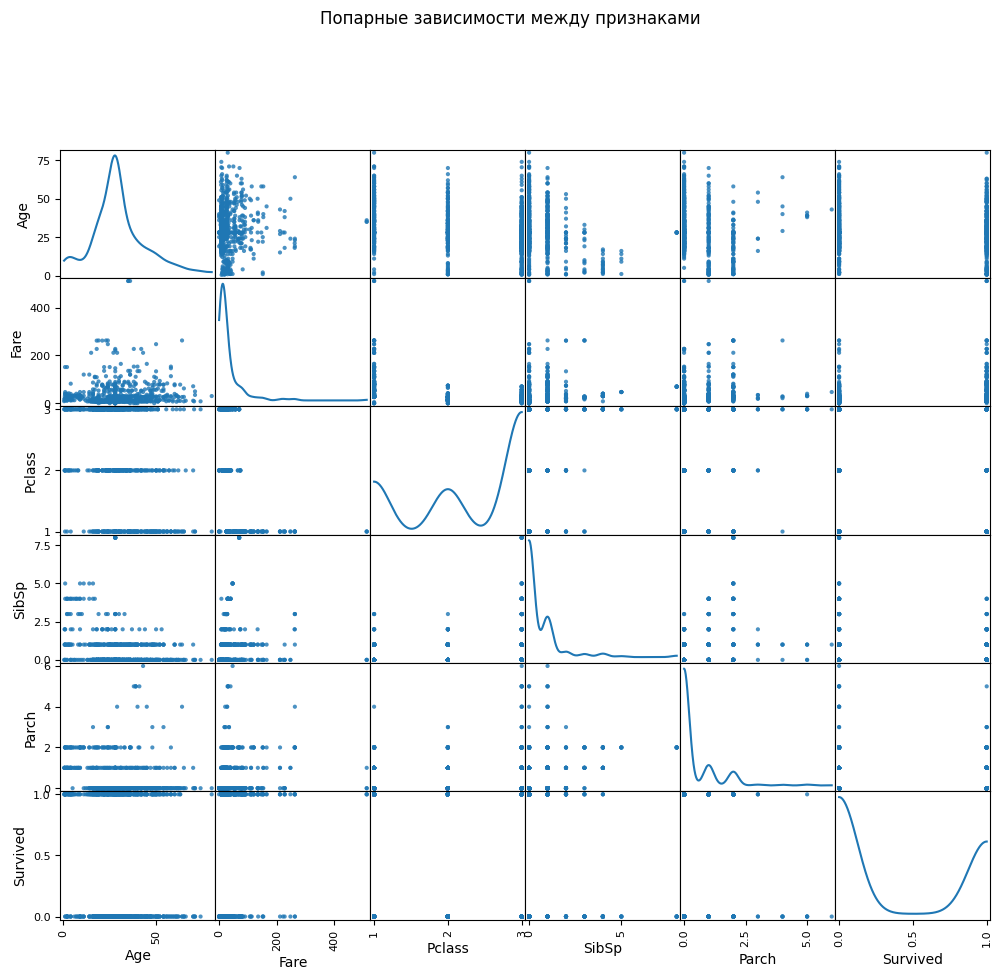

In [25]:
from pandas.plotting import scatter_matrix

columns = ['Age', 'Fare', 'Pclass', 'SibSp', 'Parch', 'Survived']

# figsize: Размер графика
# diagonal: тип графика на диагонали. 'kde' — ядерная оценка плотности, 'hist' — гистограмма
# alpha: прозрачность точек
scatter_matrix(data[columns], figsize=(12, 10), diagonal='kde', alpha=0.8)
plt.suptitle('Попарные зависимости между признаками', y=1.02)

plt.show()

**Как плата за билет (`Fare`) зависит от класса каюты (`Pclass`)? Постройте boxplot.**

C:\Users\doroh\AppData\Local\Temp\ipykernel_23280\1515635943.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Pclass', y='Fare', data=data, palette='viridis')


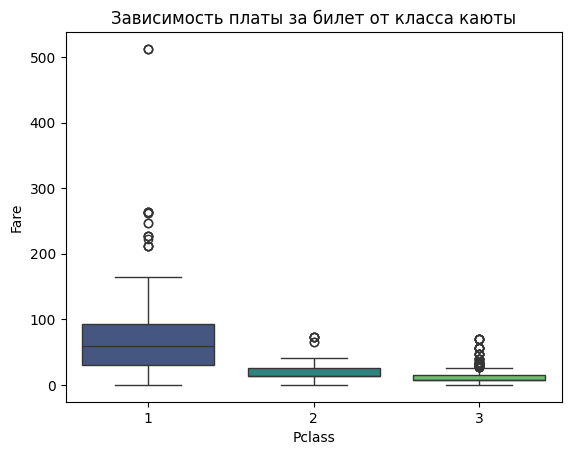

In [26]:
import seaborn as sns

sns.boxplot(x='Pclass', y='Fare', data=data, palette='viridis')

plt.title('Зависимость платы за билет от класса каюты')
plt.xlabel('Pclass')
plt.ylabel('Fare')

plt.show()

**Такой boxplot получается не очень красивым из-за выбросов.**

**Опционально: создайте признак Fare_no_out (стоимости без выбросов), в котором исключаются стоимости, отличающиеся от средней по классу более чем на 2 стандартных отклонения. Важно: надо исключать выбросы именно в зависимости от класса каюты. Иначе исключаться будут только самые большие (1 класс) и малые (3 класс) стоимости. Постройте boxplot.**

In [ ]:
# train_df['Fare_no_out'] = train_df['Fare']
# fare_pclass1 = train_df[train_df['Pclass'] == 1]['Fare']
# fare_pclass2 = train_df[train_df['Pclass'] == 2]['Fare']
# fare_pclass3 = train_df[train_df['Pclass'] == 3]['Fare']
# fare_pclass1_no_out = # Ваш код здесь
# fare_pclass2_no_out = # Ваш код здесь
# fare_pclass3_no_out = # Ваш код здесь
# train_df['Fare_no_out'] = fare_pclass1_no_out.append(fare_pclass2_no_out)\
#                                              .append(fare_pclass3_no_out)

**Каково соотношение погибших и выживших в зависимости от пола? Отобразите c помощью Seaborn.countplot (столбчатая диаграмма) c аргументом hue.**

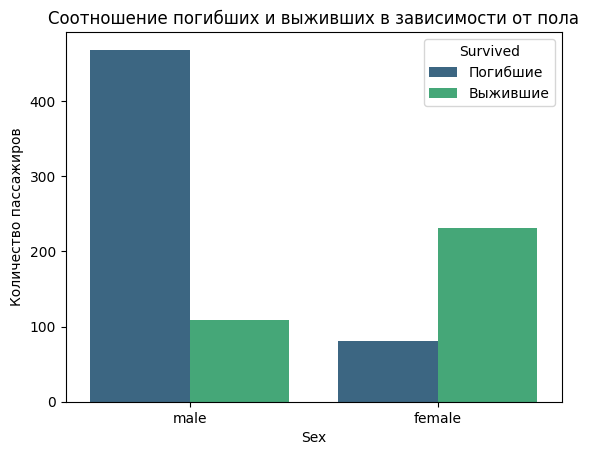

In [27]:
sns.countplot(x='Sex', hue='Survived', data=data, palette='viridis')

plt.title('Соотношение погибших и выживших в зависимости от пола')
plt.xlabel('Sex')
plt.ylabel('Количество пассажиров')
plt.legend(title='Survived', loc='upper right', labels=['Погибшие', 'Выжившие'])

plt.show()

**Каково соотношение погибших и выживших в зависимости от класса каюты? Отобразите c помощью Seaborn.countplot c аргументом hue.** 

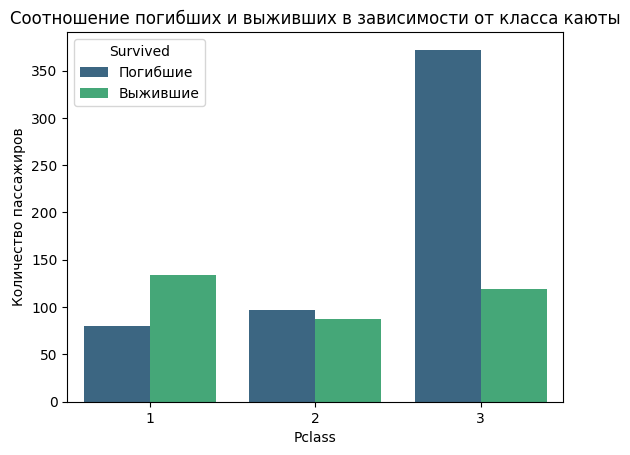

In [28]:
sns.countplot(x='Pclass', hue='Survived', data=data, palette='viridis')

plt.title('Соотношение погибших и выживших в зависимости от класса каюты')
plt.xlabel('Pclass')
plt.ylabel('Количество пассажиров')
plt.legend(title='Survived', loc='upper left', labels=['Погибшие', 'Выжившие'])

plt.show()

**Как факт выживания зависит от возраста пассажира? Проверьте (графически) предположение, что молодые чаще выживали. Пусть, условно, молодые - младше 30 лет, пожилые – старше 60 лет.**

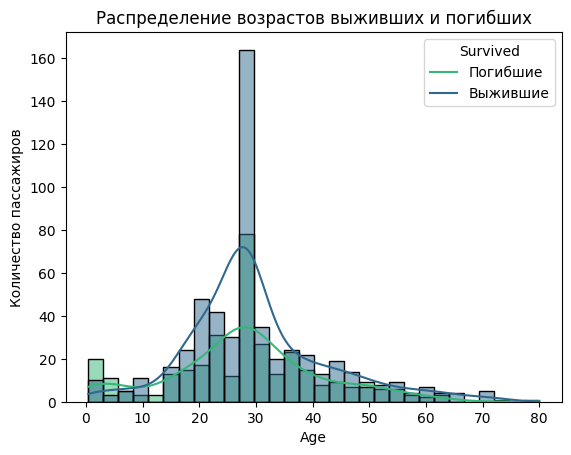

In [29]:
sns.histplot(data=data, x='Age', hue='Survived', kde=True, palette='viridis', bins=30)

# Добавление заголовков и меток
plt.title('Распределение возрастов выживших и погибших')
plt.xlabel('Age')
plt.ylabel('Количество пассажиров')
plt.legend(title='Survived', labels=['Погибшие', 'Выжившие'])

# Отображение графика
plt.show()

**Построить корреляционную матрицу. Выделить признаки, которые имень сильную корреляцию с целевой переменной**

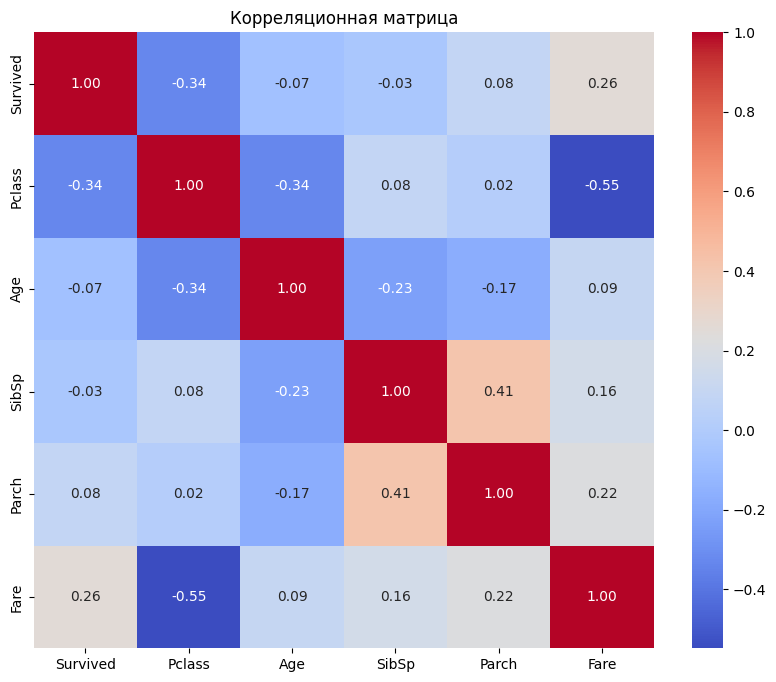

In [30]:
# очистка str типов для использования в содании корреляционной матрицы 
numeric_columns = data.select_dtypes(include=['int64', 'float64']).columns
numeric_data = data[numeric_columns]

plt.figure(figsize=(10, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Корреляционная матрица')

plt.show()